# Climate Stress Test experiment

## Introduction

Nokebook for the workflow **Snakefile_climate_experiment**: prepares futyre weather realizations and climate stress tests and run the realizations with the hydroloigcal model.

In [1]:
# Import some python libraries we will need to run this notebook
import os
from IPython import display

In [2]:
# A helper function
from subprocess import Popen, PIPE, STDOUT

from IPython.core.magic import register_line_magic


@register_line_magic
def runrealcmd(command):
    with Popen(
        command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True
    ) as process:
        for line in iter(process.stdout.readline, b""):
            print(line.rstrip().decode("utf-8"))

## Defining your climate stress test experiment

First thing is to prepare all the options for your project, this is done using the configuration or settings file below

In [3]:
# Add here the path where you have installed the blueearth-cst tool
cst_path = r'C:\Users\boisgont\D\Repos\CST\blueearth_cst'
os.chdir(cst_path)

Here we need to design uor stress test experiment. This include the number of future climate realizations as well as which climate scenarios to apply to these realizations. Stress test chnages can be applied on temperature (relative change) or on precipitation (multiplier).

The different settings are controlled via our same configuration file but now in the new section on climate experiment.

In [7]:
%%writefile ./config/my-project-settings.yml

###########################################################################################
#################################### General setting ######################################

# Path to where the wflow model will be stored (include the project name)
project_name: myModel
project_dir: examples/myModel

# Path to the data catalog to use (can be different for Linux/Windows/data stored on P drive or other)
data_sources: config/deltares_data.yml
# Path to the data catalog to use (can be different for Linux/Windows/data stored on P drive or other)
data_sources_climate: config/deltares_data_climate_projections.yml

# Time horizon of the historical period
starttime: "2000-01-01T00:00:00"
endtime: "2020-12-31T00:00:00"

###########################################################################################
#################################### Model building #######################################

# hydromt "region" for building the model, coordinates are in EPSG 4326
# for more info on how to fill this, you can see the hydromt documentation: 
# https://deltares.github.io/hydromt/latest/user_guide/cli.html#region-options
# For wflow please use either 'basin' or 'subbasin' keywords
model_region: "{'subbasin': [108.152711, 15.571764], 'strord': 3}"
# Grid resolution of the model in degrees
model_resolution: 0.0062475

# If available, please here put the path to the available observation stations locations files
# csv file containing three columns: station_ID, x, y
output_locations: None # If set to None, will default to the wflow outlets
# Path to the file with observed discharge timeseries per station 
observations_timeseries: None

###########################################################################################
################################## Climate projections ####################################
# climate models and scenarios
clim_project: cmip5
models: ['MIROC5']
scenarios: [rcp45, rcp85]
members: [r1i1p1]

variables: [precip, temp, temp_min, temp_max]

# time horizons of the climate projections
start_month_hyd_year: Jan
historical: 1960, 2000
future_horizons: 
  near: 2020, 2060
#  far: 2060, 2100

###########################################################################################
################################## Climate experiment #####################################
# Name of the experiment
experiment_name: experiment_01
# Number of climate realizations
realizations_num: 2
# Future Time horizon for the climate experiment
starttime_climate: "2030-01-01T00:00:00"
endtime_climate: "2050-12-31T00:00:00"
    
# Weathergen settings
warm.signif.level: 0.80
warm.sample.num: 30000
knn.sample.num: 120

# Climate stress test parameters
# Temperature change factors
# including number of steps and min, max change
temp:
  step_num: 1
  change_type: transient
  mean:
    min:
      - 0.0  # January
      - 0.0  # February
      - 0.0  # March
      - 0.0  # April
      - 0.0  # May
      - 0.0  # June
      - 0.0  # July
      - 0.0  # August
      - 0.0  # September
      - 0.0  # October
      - 0.0  # November
      - 0.0  # December
    max:
      - 3.0  # January
      - 3.0  # February
      - 3.0  # March
      - 3.0  # April
      - 3.0  # May
      - 3.0  # June
      - 3.0  # July
      - 3.0  # August
      - 3.0  # September
      - 3.0  # October
      - 3.0  # November
      - 3.0  # December

# Precipitation change factors
# including number of steps and min, max change
precip:
  step_num: 3
  change_type: transient
  mean:
    min:
      - 0.7  # January
      - 0.7  # February
      - 0.7  # March
      - 0.7  # April
      - 0.7  # May
      - 0.7  # June
      - 0.7  # July
      - 0.7  # August
      - 0.7  # September
      - 0.7  # October
      - 0.7  # November
      - 0.7  # December
    max:
      - 1.3  # January
      - 1.3  # February
      - 1.3  # March
      - 1.3  # April
      - 1.3  # May
      - 1.3  # June
      - 1.3  # July
      - 1.3  # August
      - 1.3  # September
      - 1.3  # October
      - 1.3  # November
      - 1.3  # December
  variance:
    min:
      - 1.0  # January
      - 1.0  # February
      - 1.0  # March
      - 1.0  # April
      - 1.0  # May
      - 1.0  # June
      - 1.0  # July
      - 1.0  # August
      - 1.0  # September
      - 1.0  # October
      - 1.0  # November
      - 1.0  # December
    max:
      - 1.0  # January
      - 1.0  # February
      - 1.0  # March
      - 1.0  # April
      - 1.0  # May
      - 1.0  # June
      - 1.0  # July
      - 1.0  # August
      - 1.0  # September
      - 1.0  # October
      - 1.0  # November
      - 1.0  # December

Overwriting ./config/my-project-settings.yml


## Running the model building workflow

The first line is to create an image of our workflow with snakemake to verify that all our settings are well taken into account.

In [8]:
! snakemake -s Snakefile_climate_experiment --configfile config/my-project-settings.yml  --dag | dot -Tpng > dag_climate.png

Building DAG of jobs...


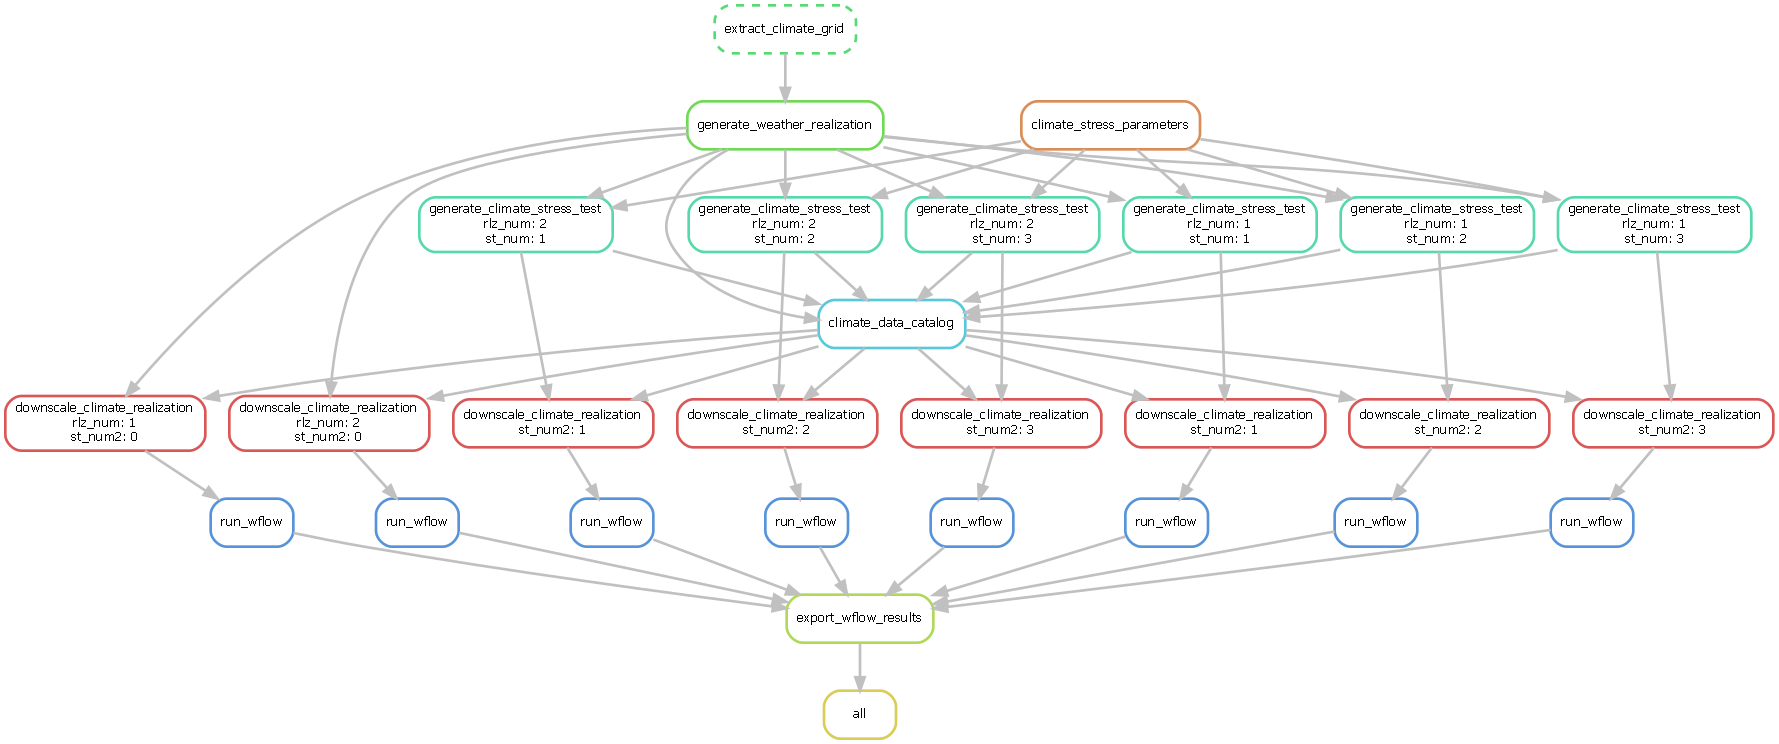

In [9]:
display.Image("./dag_climate.png")

Now we will unlock your directory in order to save the future results of the workflow. This step is most of the time not necessary.

In [10]:
! snakemake --unlock -s Snakefile_climate_experiment --configfile config/my-project-settings.yml

Unlocking working directory.


And finally let's run our worflow:

In [12]:
%runrealcmd snakemake all -c 2 -s Snakefile_climate_experiment --configfile config/my-project-settings.yml

Building DAG of jobs...
Provided cores: 2
Rules claiming more threads will be scaled down.
Job stats:
job                              count    min threads    max threads
-----------------------------  -------  -------------  -------------
all                                  1              1              1
climate_data_catalog                 1              1              1
downscale_climate_realization        8              1              1
export_wflow_results                 1              1              1
generate_climate_stress_test         6              1              1
generate_weather_realization         1              1              1
run_wflow                            8              1              1
total                               26              1              1

Select jobs to execute...

[Thu Apr 14 17:05:29 2022]
rule generate_weather_realization:
    input: examples/myModel/climate_historical/raw_data/extract_era5.nc
    output: examples/myModel/climate_experimen

## Results

First check that snake did run everything.

In [ ]:
! snakemake -s Snakefile_climate_experiment --configfile config/my-project-settings.yml  --dag | dot -Tpng > dag_climate.png

In [ ]:
display.Image("./dag_climate.png")

Let's see which files where created in our output folder.

In [ ]:
root = "examples/myModel"
for path, _, files in os.walk(root):
    print(path)
    for name in files:
        if name.endswith(".xml"):
            continue
        print(f" - {name}")